In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Speed_dataset.csv")
data.drop_duplicates(subset=['timestamp', 'vehicle_id', 'driver_id'], keep=False, inplace=True)
data.reset_index(drop=True, inplace=True)
data

latitude  longitude         timestamp  speed_mph  speedlimit_mph  \
0       34.551254 -78.784630     6/1/2015 0:04          1              55   
1       34.860115 -77.999969     6/1/2015 0:19         64              70   
2       34.328571 -78.926056     6/1/2015 0:24         23              55   
3       35.756538 -78.699715     6/1/2015 0:30          3              55   
4       34.402813 -78.916901     6/1/2015 0:33         65              70   
5       34.443115 -78.959885     6/1/2015 0:36         64              70   
6       34.590424 -79.068939     6/1/2015 0:48         65              65   
7       35.191341 -78.283020     6/1/2015 0:49         64              70   
8       34.552170 -78.784126     6/1/2015 0:55         27              55   
9       35.757271 -78.699623     6/1/2015 1:13          6              45   
10      34.947567 -78.905853     6/1/2015 1:18         65              70   
11      34.813793 -78.836586     6/1/2015 1:20         62              55   
12      35.792152 -78.695999     6/1/2015 1:21         52              55   
13      35.131229 -78.745583     6/1/2015 1:33         65              65   
14      35.152477 -78.723122     6/1/2015 1:34         64              65   
15      35.902550 -78.661781     6/1/2015 1:35         20              45   
16      35.900974 -78.654831     6/1/2015 1:39          2              55   
17      35.316628 -78.574760     6/1/2015 1:48         65              65   
18      35.205078 -78.666710     6/1/2015 1:50         65              65   
19      35.550716 -78.301056     6/1/2015 1:50         20              45   
20      35.504898 -78.326180     6/1/2015 2:10          1              55   
21      35.901066 -78.653580     6/1/2015 2:12         29              45   
22      35.249931 -78.355774     6/1/2015 2:19         43              35   
23      35.520782 -78.292931     6/1/2015 2:20         34              45   
24      35.833126 -78.631630     6/1/2015 2:21         65              60   
25      35.505112 -78.324837     6/1/2015 2:37         28              35   
26      34.933727 -78.047127     6/1/2015 2:49         64              70   
27      35.550507 -78.301262     6/1/2015 2:49         23              45   
28      35.547897 -78.303856     6/1/2015 2:50         38              45   
29      35.547409 -78.310432     6/1/2015 2:51         65              55   
...           ...        ...               ...        ...             ...   
204702  35.755730 -78.657730  11/30/2015 23:21         13              65   
204703  35.756733 -78.670097  11/30/2015 23:21          6              65   
204704  36.080715 -79.938736  11/30/2015 23:22         43              45   
204705  35.774963 -79.828644  11/30/2015 23:23         64              65   
204706  35.888416 -78.679810  11/30/2015 23:23         40              45   
204707  35.592716 -78.599861  11/30/2015 23:24          3              55   
204708  34.433483 -79.358261  11/30/2015 23:27         25              45   
204709  34.812923 -78.988190  11/30/2015 23:28          2              35   
204710  35.547462 -78.305504  11/30/2015 23:29          4              45   
204711  35.839710 -78.676704  11/30/2015 23:29         22              45   
204712  35.839073 -78.675674  11/30/2015 23:30          6              45   
204713  35.836208 -78.666985  11/30/2015 23:34         60              60   
204714  35.519634 -78.289124  11/30/2015 23:36         32              65   
204715  35.993073 -79.827271  11/30/2015 23:38         64              55   
204716  35.603630 -78.425621  11/30/2015 23:39         65              70   
204717  34.813755 -78.987976  11/30/2015 23:43          6              35   
204718  35.886795 -78.659653  11/30/2015 23:43          1              55   
204719  35.744434 -78.592674  11/30/2015 23:45         64              65   
204720  36.284878 -76.233643  11/30/2015 23:45          5              55   
204721  35.605995 -78.448830  11/30/2015 23:47         64              70   
20472

In [3]:
data.shape

(204732, 11)

- using the concept of quantile and taking all divers who are above the speed limit and above the 75% speed of all drivers as "bad drivers" and adding those driver and vehicle id to another Dataframe

In [4]:
p75_grouped_speed_limit = data.groupby('speedlimit_mph').quantile(.75).speed_mph.rename("75_quantile")
p25_grouped_speed_limit = data.groupby('speedlimit_mph').quantile(.25).speed_mph.rename("25_quantile")
p_grouped = pd.concat([p75_grouped_speed_limit, p25_grouped_speed_limit], axis = 1)
p_grouped = dict(p_grouped)
p75_grouped_speed_limit = dict(p_grouped['75_quantile'])
p25_grouped_speed_limit = dict(p_grouped['25_quantile'])
outliers = [ (data.latitude[x], data.longitude[x],data.vehicle_id[x], data.driver_id[x], data.timestamp[x]) for x in range(0, len(data)) if data.speed_mph[x] > data.speedlimit_mph[x] or data.speed_mph[x] > p75_grouped_speed_limit[data.speedlimit_mph[x]] or data.speed_mph[x] < p25_grouped_speed_limit[data.speedlimit_mph[x]]]
outliers_dataframe = pd.DataFrame(outliers, columns=["latitude", "logitude",'Vehicle_id', 'Driver_id', 'TimeStamp'])
outliers_dataframe


latitude   logitude  Vehicle_id  Driver_id         TimeStamp
0      34.551254 -78.784630     1262441     916461     6/1/2015 0:04
1      35.756538 -78.699715     1280223    1145487     6/1/2015 0:30
2      34.813793 -78.836586     1262441     916461     6/1/2015 1:20
3      35.900974 -78.654831     1280223    1145487     6/1/2015 1:39
4      35.504898 -78.326180      550280     500201     6/1/2015 2:10
5      35.901066 -78.653580     1280223    1145487     6/1/2015 2:12
6      35.249931 -78.355774     1208979       5693     6/1/2015 2:19
7      35.520782 -78.292931     1262441     916461     6/1/2015 2:20
8      35.833126 -78.631630     1280223    1145487     6/1/2015 2:21
9      35.547897 -78.303856     1262441     916461     6/1/2015 2:50
10     35.547409 -78.310432     1280223    1145487     6/1/2015 2:51
11     35.550900 -78.306007     1280223          0     6/1/2015 2:56
12     35.547401 -78.304810      534766    1145487     6/1/2015 3:05
13     35.607918 -78.451576      534766    1145487     6/1/2015 3:15
14     35.612972 -78.467590      534766    1145487     6/1/2015 3:16
15     35.609436 -78.455505      550280     500201     6/1/2015 3:18
16     35.754753 -78.580444      550280     500201     6/1/2015 3:33
17     35.894123 -78.622795     1262441     916461     6/1/2015 3:34
18     34.242645 -77.860428     1208979       5693     6/1/2015 3:40
19     35.766666 -78.768410      534766    1145487     6/1/2015 3:46
20     35.770874 -78.782112      534766    1145487     6/1/2015 3:47
21     35.764675 -78.559914      550280     500201     6/1/2015 3:52
22     35.836983 -78.613792     1262441     916461     6/1/2015 4:04
23     35.756512 -78.699760      550280     500201     6/1/2015 4:05
24     34.245472 -77.874435     1208979       5693     6/1/2015 4:19
25     34.243492 -77.883736     1208979       5693     6/1/2015 4:20
26     35.836189 -78.614166     1262441     916461     6/1/2015 4:21
27     35.755779 -78.700417      550280     500201     6/1/2015 4:26
28     35.816170 -78.660316     1262441     916461     6/1/2015 4:29
29     35.761238 -78.733307      550280     500201     6/1/2015 5:18
...          ...        ...         ...        ...               ...
90828  35.592949 -78.774467      550768    1288064  11/30/2015 22:28
90829  35.740013 -78.805702      550272    1305549  11/30/2015 22:34
90830  35.112736 -78.926811     1208979       5693  11/30/2015 22:34
90831  37.351658 -79.623276      118303          0  11/30/2015 22:36
90832  34.195805 -77.905472     1208431      14675  11/30/2015 22:37
90833  35.894821 -78.861115     1173291    1265441  11/30/2015 22:47
90834  35.551025 -78.300232     1280223     916461  11/30/2015 22:50
90835  37.351387 -79.624687      118303          0  11/30/2015 22:51
90836  35.889431 -78.679428     1190543    1235549  11/30/2015 22:56
90837  36.081203 -79.933586      617989    1272718  11/30/2015 22:57
90838  34.231270 -77.996025     1191353    1163791  11/30/2015 23:05
90839  34.194496 -77.889435     1208431      14675  11/30/2015 23:08
90840  35.590466 -78.735794      550768    1288064  11/30/2015 23:11
90841  34.134796 -77.894974     1208431      14675  11/30/2015 23:14
90842  35.762196 -78.454979      567435    1256913  11/30/2015 23:16
90843  35.757446 -78.726204     1173291    1265441  11/30/2015 23:17
90844  34.123180 -77.901016     1208431          0  11/30/2015 23:17
90845  35.317802 -78.361588     1280223     916461  11/30/2015 23:21
90846  35.755730 -78.657730      550272    1305549  11/30/2015 23:21
90847  35.756733 -78.670097     1173291    1265441  11/30/2015 23:21
90848  36.080715 -79.938736      617989    1272718  11/30/2015 23:22
90849  35.888416 -78.679810     1190543    1235549  11/30/2015 23:23
90850  35.592716 -78.599861      550768    1288064  11/30/2015 23:24
90851  34.433483 -79.358261     1351613     322085  11/30/2015 23:27
90852  34.812923 -78.988190     1208979       5693  11/30/2015 23:28
90853  35.519634 -78.289124        1462    1222453  11/30/2015 23:36
90854 

In [5]:
import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)


- please change the access token if trying out

- using plotly and mapbox for dynamic scatter plot on the map

In [6]:
map_data = [go.Scattermapbox(
            lat= outliers_dataframe.latitude,
            lon= outliers_dataframe.logitude,
            mode='markers',
            marker=go.scattermapbox.Marker(
                size= 4,
                color = 'gold',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1IjoiZmlyYWF6IiwiYSI6ImNqdGJqNzVieDBnaXo0NHBmeDlrd2k1NTEifQ.ltUH3IJLjJQnNPVOiBdc5w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"),
                    width=900,
                    height=600, title = "Bad drivers")
fig = dict(data=map_data, layout=layout)
iplot(fig)

In [7]:
highway_data = data.groupby('isHighway')
on_highway = highway_data.get_group(1)
not_highway = highway_data.get_group(0)

bad_on_highway = [x for x in on_highway.values if x[3] > x[4] or x[3] > p75_grouped_speed_limit[x[4]] or x[3] < p25_grouped_speed_limit[x[4]]]
bad_not_highway = [x for x in not_highway.values if x[3] > x[4] or x[3] > p75_grouped_speed_limit[x[4]] or x[3] < p25_grouped_speed_limit[x[4]]]

percentage_bad_on_highway = (len(bad_on_highway)/len(on_highway)) * 100
percentage_bad_not_highway = (len(bad_not_highway)/len(not_highway)) * 100
print("percentage bad on highway = {}\npercentage bad not on highway = {}".format(percentage_bad_on_highway, percentage_bad_not_highway))

percentage bad on highway = 45.913722772589104
percentage bad not on highway = 41.8722506624135


#### the above result shows that there are more people who drive bad (percentage wise) on highway than not on highway

In [8]:
plt.pie([len(bad_not_highway), len(bad_on_highway)], autopct="%.2f%%", labels=['bad on highway', 'bad not on highway']
       , shadow=True, explode= [0.1, 0])
plt.plot()

[]

#### the above pie chart shows that there are more number of people driving in an unoderly way not on highways than on highways

In [11]:
import seaborn as sns

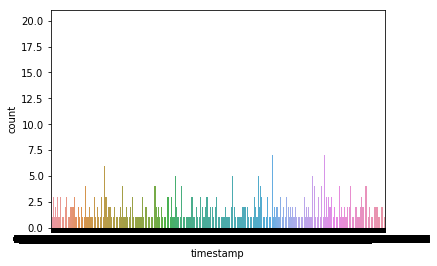

In [12]:
sns.countplot(x='timestamp', data=data)

In [14]:
sns.countplot(x='TimeStamp', data=outliers_dataframe)